# Chirp to ROC


In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

# to reload the routines
from imp import reload

import chirp_roc_lib as chp

In [15]:
reload(chp)

<module 'chirp_roc_lib' from '/home/dd/Documents/Python/chirp-to-ROC/chirp_roc_lib.py'>

In [3]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.5, 5.5) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

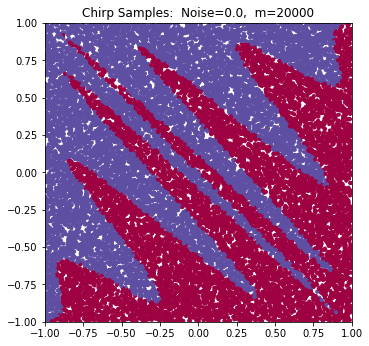

In [4]:
# Show the chirp model with no noise and many samples
show_noise=0.0
show_X, show_Y = chp.make_chirp(n_out=20000, nhalfcycles=6.5, noise=show_noise, symmetric=False)

# set figure limits
xmin = -1.0
xmax = 1.0
ymin = -1.0
ymax = 1.0

plt.title("Chirp Samples:  Noise={},  m={}".format(show_noise,len(show_Y)))
axes = plt.gca()
axes.set_xlim([xmin,xmax])
axes.set_ylim([ymin,ymax])
plt.scatter(show_X[:,0], show_X[:,1], c=show_Y.squeeze(), s=10, cmap=plt.cm.Spectral);

In [5]:
# Size of the Training and Test sets...
m_train = 500
m_test = 10000

In [6]:
# Could use an sklearn generator, make_moons, to generate X,Ys:
# Training set
##train_X, train_Y = sklearn.datasets.make_moons(n_samples=m_train, noise=0.2)
# Test set
##test_X, test_Y = sklearn.datasets.make_moons(n_samples=m_test, noise=0.2)

In [7]:
# Use the chirp to generate the training and test sets
#
# Using: nhalfcycles=6.5, warpexp=0.65, symmetric=False, noise=0.035;
# this level of noise limits accuracy to ~ 85 % .
# Training set
train_X, train_Y = chp.make_chirp(n_out=m_train, nhalfcycles=6.5, noise=0.035, symmetric=False)
# Test set
test_X, test_Y = chp.make_chirp(n_out=m_test, nhalfcycles=6.5, noise=0.035, symmetric=False)

In [8]:
# The sizes of the training and test sets
print(train_X.shape, train_X.dtype, train_Y.shape, train_Y.dtype, test_X.shape, test_Y.shape)

(500, 2) float64 (500,) float64 (10000, 2) (10000,)


In [9]:
# example values
print( train_X[0,:], train_Y[0])

[0.01676847 0.53446148] 0.0


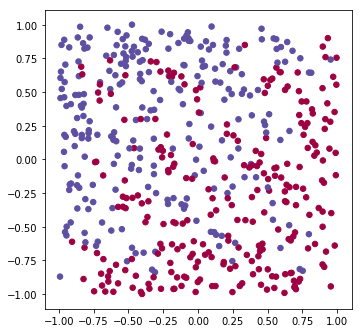

In [10]:
   plt.scatter(train_X[ : , 0], train_X[ : , 1], c=train_Y, s=30, cmap=plt.cm.Spectral);

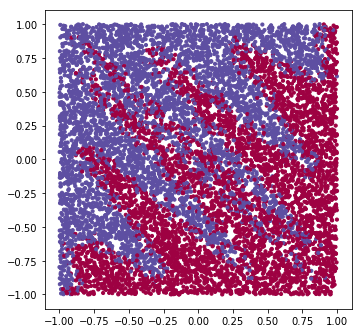

In [11]:
   plt.scatter(test_X[ : , 0 ], test_X[ : , 1 ], c=test_Y, s=10, cmap=plt.cm.Spectral);

In [12]:
# Use ML to train the values of a model...

In [13]:
# Use the ML result to assign/predict a y_hat for the Test Xs
y_hat = chp.chirp_region(test_X)


Confusion matrix:

   Predicted   0.0   1.0
Actual                 
0.0          3275  1773
1.0          1704  3248

Results:

 False Pos =  35.122820919175915 %
 False Neg =  34.41033925686591 %
    Recall =  65.58966074313409 %
 Precision =  64.68830910177256 %

    Accuracy =  65.23 %
 Pos. fract. =  49.519999999999996 %


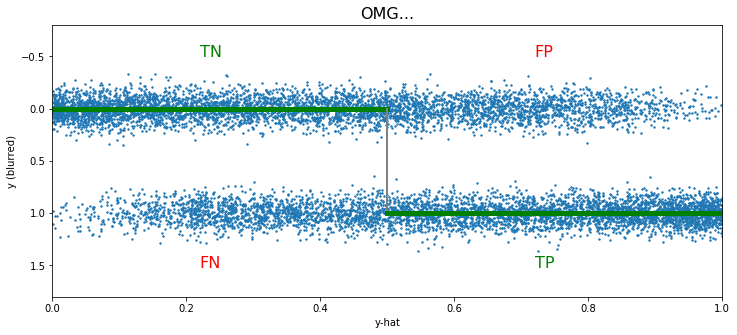

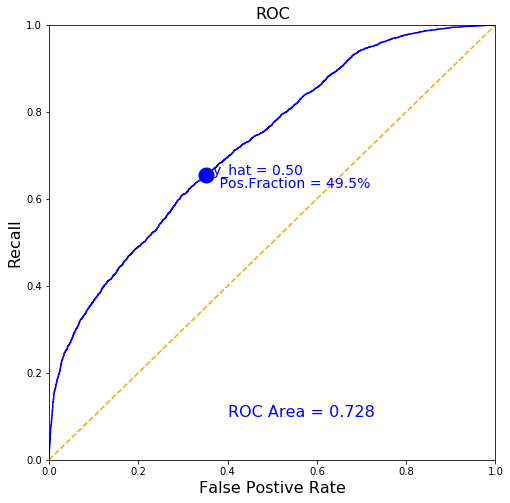

In [16]:
# How does y_hat do?
ysframe = chp.y_yhat_plots(test_Y, y_hat, "OMG...")

In [18]:
ysframe.head(5)

,y-hat,y,y-pred,y (blurred),Recall,FPR
0,0.000014,0.0,0.0,0.018120,1.0,0.999802
1,0.000176,0.0,0.0,0.083135,1.0,0.999604
2,0.000383,0.0,0.0,0.071453,1.0,0.999406
3,0.000487,0.0,0.0,-0.170631,1.0,0.999208
4,0.000662,0.0,0.0,0.040680,1.0,0.999010


In [19]:
ysframe.tail(5)

,y-hat,y,y-pred,y (blurred),Recall,FPR
9995,0.999731,1.0,1.0,1.035982,0.000808,0.0
9996,0.999903,1.0,1.0,1.063905,0.000606,0.0
9997,0.999904,1.0,1.0,0.933682,0.000404,0.0
9998,0.999909,1.0,1.0,0.966672,0.000202,0.0
9999,0.999996,1.0,1.0,1.172426,0.000000,0.0
